# Práctica 2: Aprendizaje automático

__Fecha de entrega: 30 de marzo de 2023__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 2 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

__Número de grupo: 12__

__Nombres de los estudiantes: Greta Angolani y Héloïse Lafargue__

# Apartado 2: Clasificación

## 1) Carga del conjunto de datos

---



En este notebook trabajaremos con un conjunto de datos con diferentes características médicas de personas. El objetivo es establecer un diagnóstico sobre si tiene dolor lumbar o no.

Las variables del conjunto de datos son las siguientes: pelvic_incidence, pelvic_tilt, lumbar_lordosis_angle, sacral_slope, pelvic_radius, degree_spondylolisthesis, pelvic_slope, Direct_tilt, thoracic_slope, cervical_tilt, sacrum_angle, scoliosis_slope.

Crea un dataframe a partir del fichero `lower_back_pain_dataset2.csv` que se proporciona junto con la práctica.



In [28]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [29]:
# acceso a google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/IA2/p2/lower_back_pain_dataset2.csv')
data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


## 2) Análisis de los datos

Comprueba si las clases a predecir están equilibradas y explica cómo afecta tener o no clases equilibradas a la hora de entrenar y evaluar un modelo.

Calcula la correlación de las variables con la variable `Class_att`. ¿Cuáles tienen mayor correlación con la variable de salida? ¿Qué conclusiones puedes extraer?

Comprueba los rangos y distribuciones de las variables numéricas con mayor correlación con la variable `Class_att`. Dibuja el diagrama de dispersión entre cada par de variables asignando un color diferente a los puntos que se corresponden con cada una de las 2 categorías a predecir. ¿Hay pares de variables que separen bien las clases? 

A tenor de todo el análisis, ¿crees que va a ser un problema sencillo o complicado de resolver?

In [31]:
data.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


### a) Frecuencia de las clases

In [32]:
# Número de ejemplos en cada clase
data['Class_att'].value_counts()

Abnormal    210
Normal      100
Name: Class_att, dtype: int64

In [33]:
# Frecuencia de las clases
data['Class_att'].value_counts() / data['Class_att'].count() * 100

Abnormal    67.741935
Normal      32.258065
Name: Class_att, dtype: float64

<Axes: >

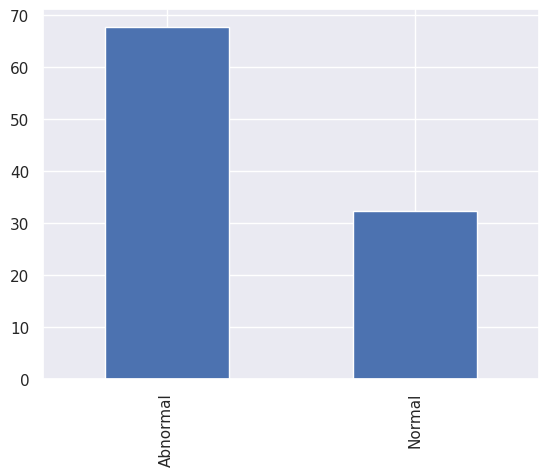

In [34]:
(data['Class_att'].value_counts() / data['Class_att'].count() * 100).sort_index().plot.bar()

En este caso la clase "Abnormal" es más frecuente que la clase "Normal" (aprox. 2/3 frente a 1/3).

Podemos visualizar el porcentaje de "Abnormal" y "Normal" en el diagrama tambien.

Entonces, como hay casi el doble de valores para la clase "Abnormal", el entrenamiento será mejor en esta clase y el modelo reconocerá mejor esta clase que la clase "Normal". Al contrario, si las clases hubieran sido equilibradas, la evaluacion deberia estar tan buena para cada clase.

### b) Correlación de las variables

Visualizamos la correlación entre todas las variables con un diagrama "heatmap".

<Axes: >

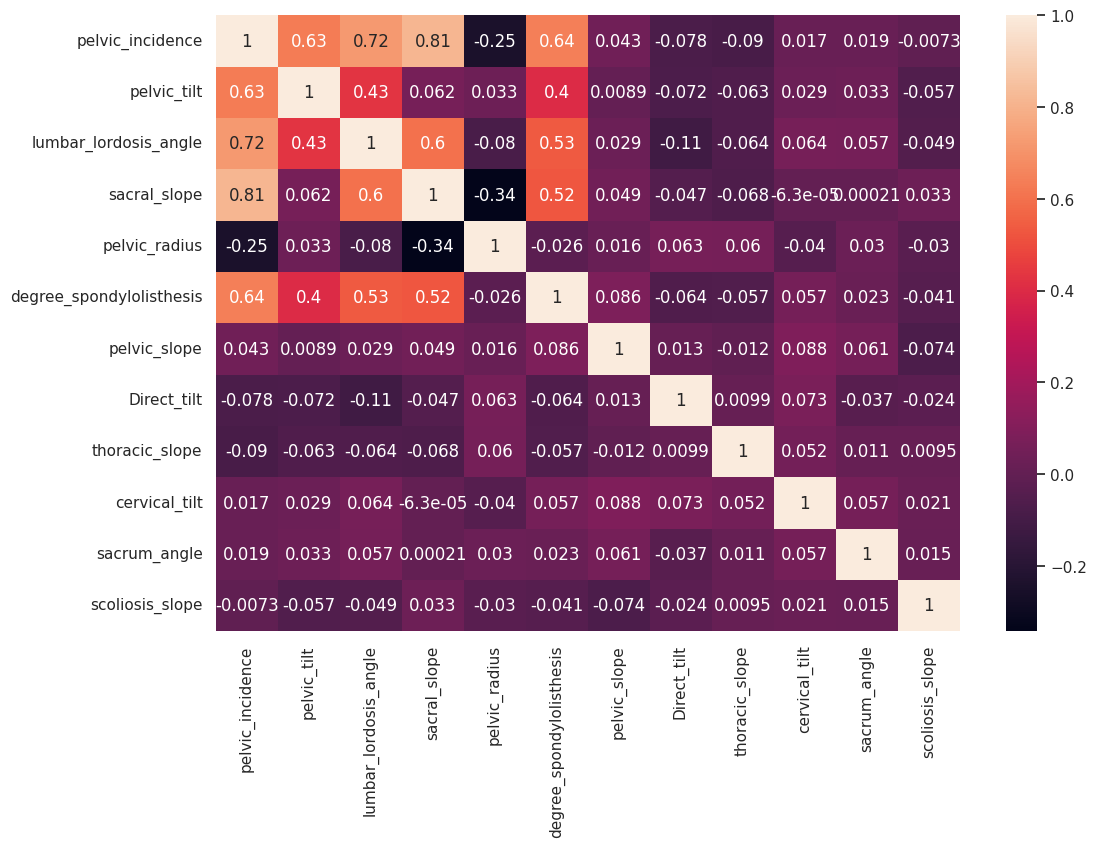

In [35]:
plt.subplots(figsize=(12,8))
sns.heatmap(data.corr(), annot=True)

La mayor correlación con la variable de salida es con las 6 primeras variables, es decir: pelvic_incidence, pelvic_tilt, lumbar_lordosis_angle, sacral_slope, pelvic_radius and degree_spondylolisthesis.

Entonces identificamos estas 6 variables como las mas relevantes para determinar si el dolor lumbar es normal o no.

### c) Rangos y distribuciones de las variables numéricas con mayor correlación con la variable Class_att

Comprobamos los rangos y distribuciones de las variables numéricas con mayor correlación con la variable Class_att. Dibujamos el diagrama de dispersión entre cada par de variables asignando un color diferente a los puntos que se corresponden con cada una de las 2 categorías a predecir.

array([[<Axes: xlabel='pelvic_incidence', ylabel='pelvic_incidence'>,
        <Axes: xlabel='pelvic_tilt', ylabel='pelvic_incidence'>,
        <Axes: xlabel='lumbar_lordosis_angle', ylabel='pelvic_incidence'>,
        <Axes: xlabel='sacral_slope', ylabel='pelvic_incidence'>,
        <Axes: xlabel='pelvic_radius', ylabel='pelvic_incidence'>,
        <Axes: xlabel='degree_spondylolisthesis', ylabel='pelvic_incidence'>],
       [<Axes: xlabel='pelvic_incidence', ylabel='pelvic_tilt'>,
        <Axes: xlabel='pelvic_tilt', ylabel='pelvic_tilt'>,
        <Axes: xlabel='lumbar_lordosis_angle', ylabel='pelvic_tilt'>,
        <Axes: xlabel='sacral_slope', ylabel='pelvic_tilt'>,
        <Axes: xlabel='pelvic_radius', ylabel='pelvic_tilt'>,
        <Axes: xlabel='degree_spondylolisthesis', ylabel='pelvic_tilt'>],
       [<Axes: xlabel='pelvic_incidence', ylabel='lumbar_lordosis_angle'>,
        <Axes: xlabel='pelvic_tilt', ylabel='lumbar_lordosis_angle'>,
        <Axes: xlabel='lumbar_lordosis_an

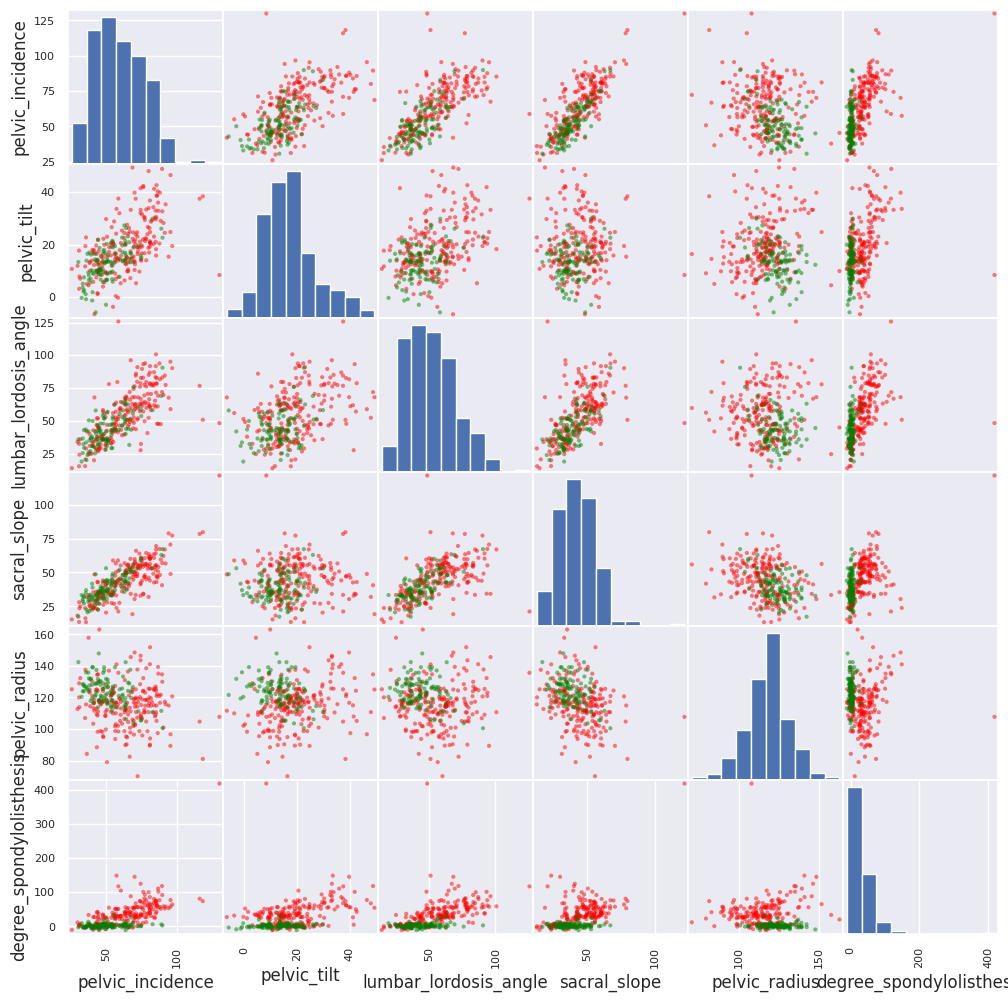

In [36]:
from pandas.plotting import scatter_matrix
%matplotlib inline

dic_colors = {'Abnormal': 'red', 'Normal': 'green'}
colors = data['Class_att'].map(dic_colors)
data_select = data[['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']]

scatter_matrix(data_select, figsize = (12, 12), diagonal = 'hist', color=colors)


Una nube de puntos muy próximos en la misma diagonal indica una fuerte correlación.
Asi vemos que los pares de variables que separen bien las clases son:

pelvic_incidence / lumbar_lordosis_angle

pelvic_incidence / sacral_slope

lumbar_lordosis_angle / sacral_slope

### d) Conclusion del análisis de los datos

A tener de todo el análisis, pensamos que el problema es mas bien sencillo de resolver gracias a la relevencia de las 6 primeros variables: pelvic_incidence, pelvic_tilt, lumbar_lordosis_angle, sacral_slope, pelvic_radius and degree_spondylolisthesis. Y sobre todo pelvic_incidence, lumbar_lordosis_angle y sacral_slope van a ser claves para la resolucion.

## 3) Árboles de decisión

Aplica árboles de decisión para resolver el problema



### 3.1) Normalización de los datos

Decide razonadamente si es necesario escalar o estandarizar los datos.

In [37]:
data.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


Como vamos a utilizar árboles de decisión, no es necesario reescalar los datos.

### 3.2) Optimizando el número mínimo de ejemplos para dividir un nodo

En este apartado vamos a entrenar nuestro clasificador e intentar dar con una parametrización que aprenda "lo justo", sin quedarse corto, ni sobreaprender.

Para ello, probaremos distintos árboles variando la profundidad máxima y usando validación cruzada en 10 partes. 

Pinta las curvas de apredizaje para distintos valores de dicho parámetro en entrenamiento y validación. Analiza e interpreta las curvas (¿qué puedes decir de cómo varía el comportamiento de clasificador en entrenamiento y validación a medida que cambia el valor del parámetro?) y decide de manera razonada qué valor del parámetro es el que consideras más adecuado.

Los árboles que vas a entrenar deben utilizar la entropía como criterio de selección de variables.

Como sklearn trabaja con arrays, deberás acceder al array interno del dataframe. Crea un array que contenga sólo los datos de entrenamiento (sin la variable a predecir) y otro array que sólo contenga la variable a predecir. Usaremos __todas__ las variables del dataset para construir el árbol.


Vamos a calcular la profundidad optima usando validación cruzada y probando distintos valores de ese parámetro.

In [38]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
import numpy as np

RANDOM_STATE = 83
salida = np.array(data['Class_att'])
data_select = data[['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'pelvic_slope', 'Direct_tilt', 'thoracic_slope', 'cervical_tilt', 'sacrum_angle', 'scoliosis_slope']]
train_accuracy = []
test_accuracy = []

# Entrenamos y validamos varios árboles con distintas profundidades máximas
max_depths = range(1, 10)
for md in max_depths: 
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=md, min_samples_split=2, random_state=RANDOM_STATE)
    scores = cross_validate(clf, data_select, salida, scoring='accuracy', cv=10, return_train_score=True)
    
    train_accuracy.append(np.mean(scores['train_score']))
    test_accuracy.append(np.mean(scores['test_score']))
    
train_accuracy, test_accuracy

([0.778494623655914,
  0.8179211469534049,
  0.8616487455197133,
  0.9003584229390682,
  0.9225806451612903,
  0.9473118279569894,
  0.9637992831541219,
  0.9706093189964158,
  0.9802867383512546],
 [0.7709677419354839,
  0.6548387096774194,
  0.7451612903225806,
  0.7419354838709677,
  0.7741935483870968,
  0.7645161290322581,
  0.7483870967741935,
  0.7387096774193549,
  0.7419354838709677])

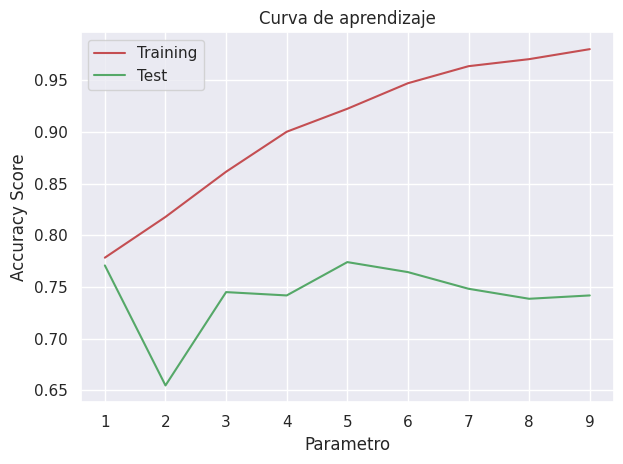

In [39]:
import matplotlib.pyplot as plt

# Draw lines
plt.plot(max_depths, train_accuracy, color="r",  label="Training")
plt.plot(max_depths, test_accuracy, color="g", label="Test")

# Create plot
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()   

Para max_depth=5 obtenemos el mejor valor de exactitud para el conjunto de test. A partir de esa profundidad la métrica mejora para el conjunto de entrenamiento y empeora para el conjunto de test indicando que el clasificador está sobre-entrenado y generaliza peor.

### 3.3) Analizando el árbol de decisión

Crea un nuevo árbol de decisión con el parámetro elegido en el apartado anterior y dibújalo (si es muy profundo dibuja solamente los primeros niveles). 

Obtén también la importancia de las variables, que es una agregación de su poder discriminante en los distintos nodos del árbol donde se usan (más info [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_)) y píntala en una gráfica.

Con esos gráficos, contesta lo siguiente:

- ¿Cuáles son las variables más importantes y en qué orden? 
- ¿Hay variables del conjunto de datos que no se han usado? 
- ¿Cuál sería la tasa de aciertos (_accuracy_) del árbol sobre el conjunto de entrenamiento si sólo hiciera una pregunta? 
- ¿El árbol que has calculado es capaz de separar las clases? 
- Si no has mostrado el árbol completo, en la parte que estás viendo, ¿qué clases se separan mejor o peor? ¿qué variables ayudan a discriminarlas?
- ¿En cuál de los nodos del segundo nivel del árbol existe mayor confusión (siendo la raíz el nivel 0)?

__Nota__: al dibujar el árbol con la función `plot_tree` el parámetro `class_names` espera recibir una serie de datos de tipo cadena. Puedes convertir la serie de categorías a una serie de cadenas usando `mi_serie.astype('str')`.


In [55]:
from sklearn.tree import DecisionTreeClassifier

# Creamos un árbol de decisión con el parámetro elegido y lo entrenamos
RANDOM_STATE = 83
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=2, random_state=RANDOM_STATE)
data_select = data[['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'pelvic_slope', 'Direct_tilt', 'thoracic_slope', 'cervical_tilt', 'sacrum_angle', 'scoliosis_slope']]
salida = np.array(data['Class_att'])
clf = clf.fit(data_select,salida)


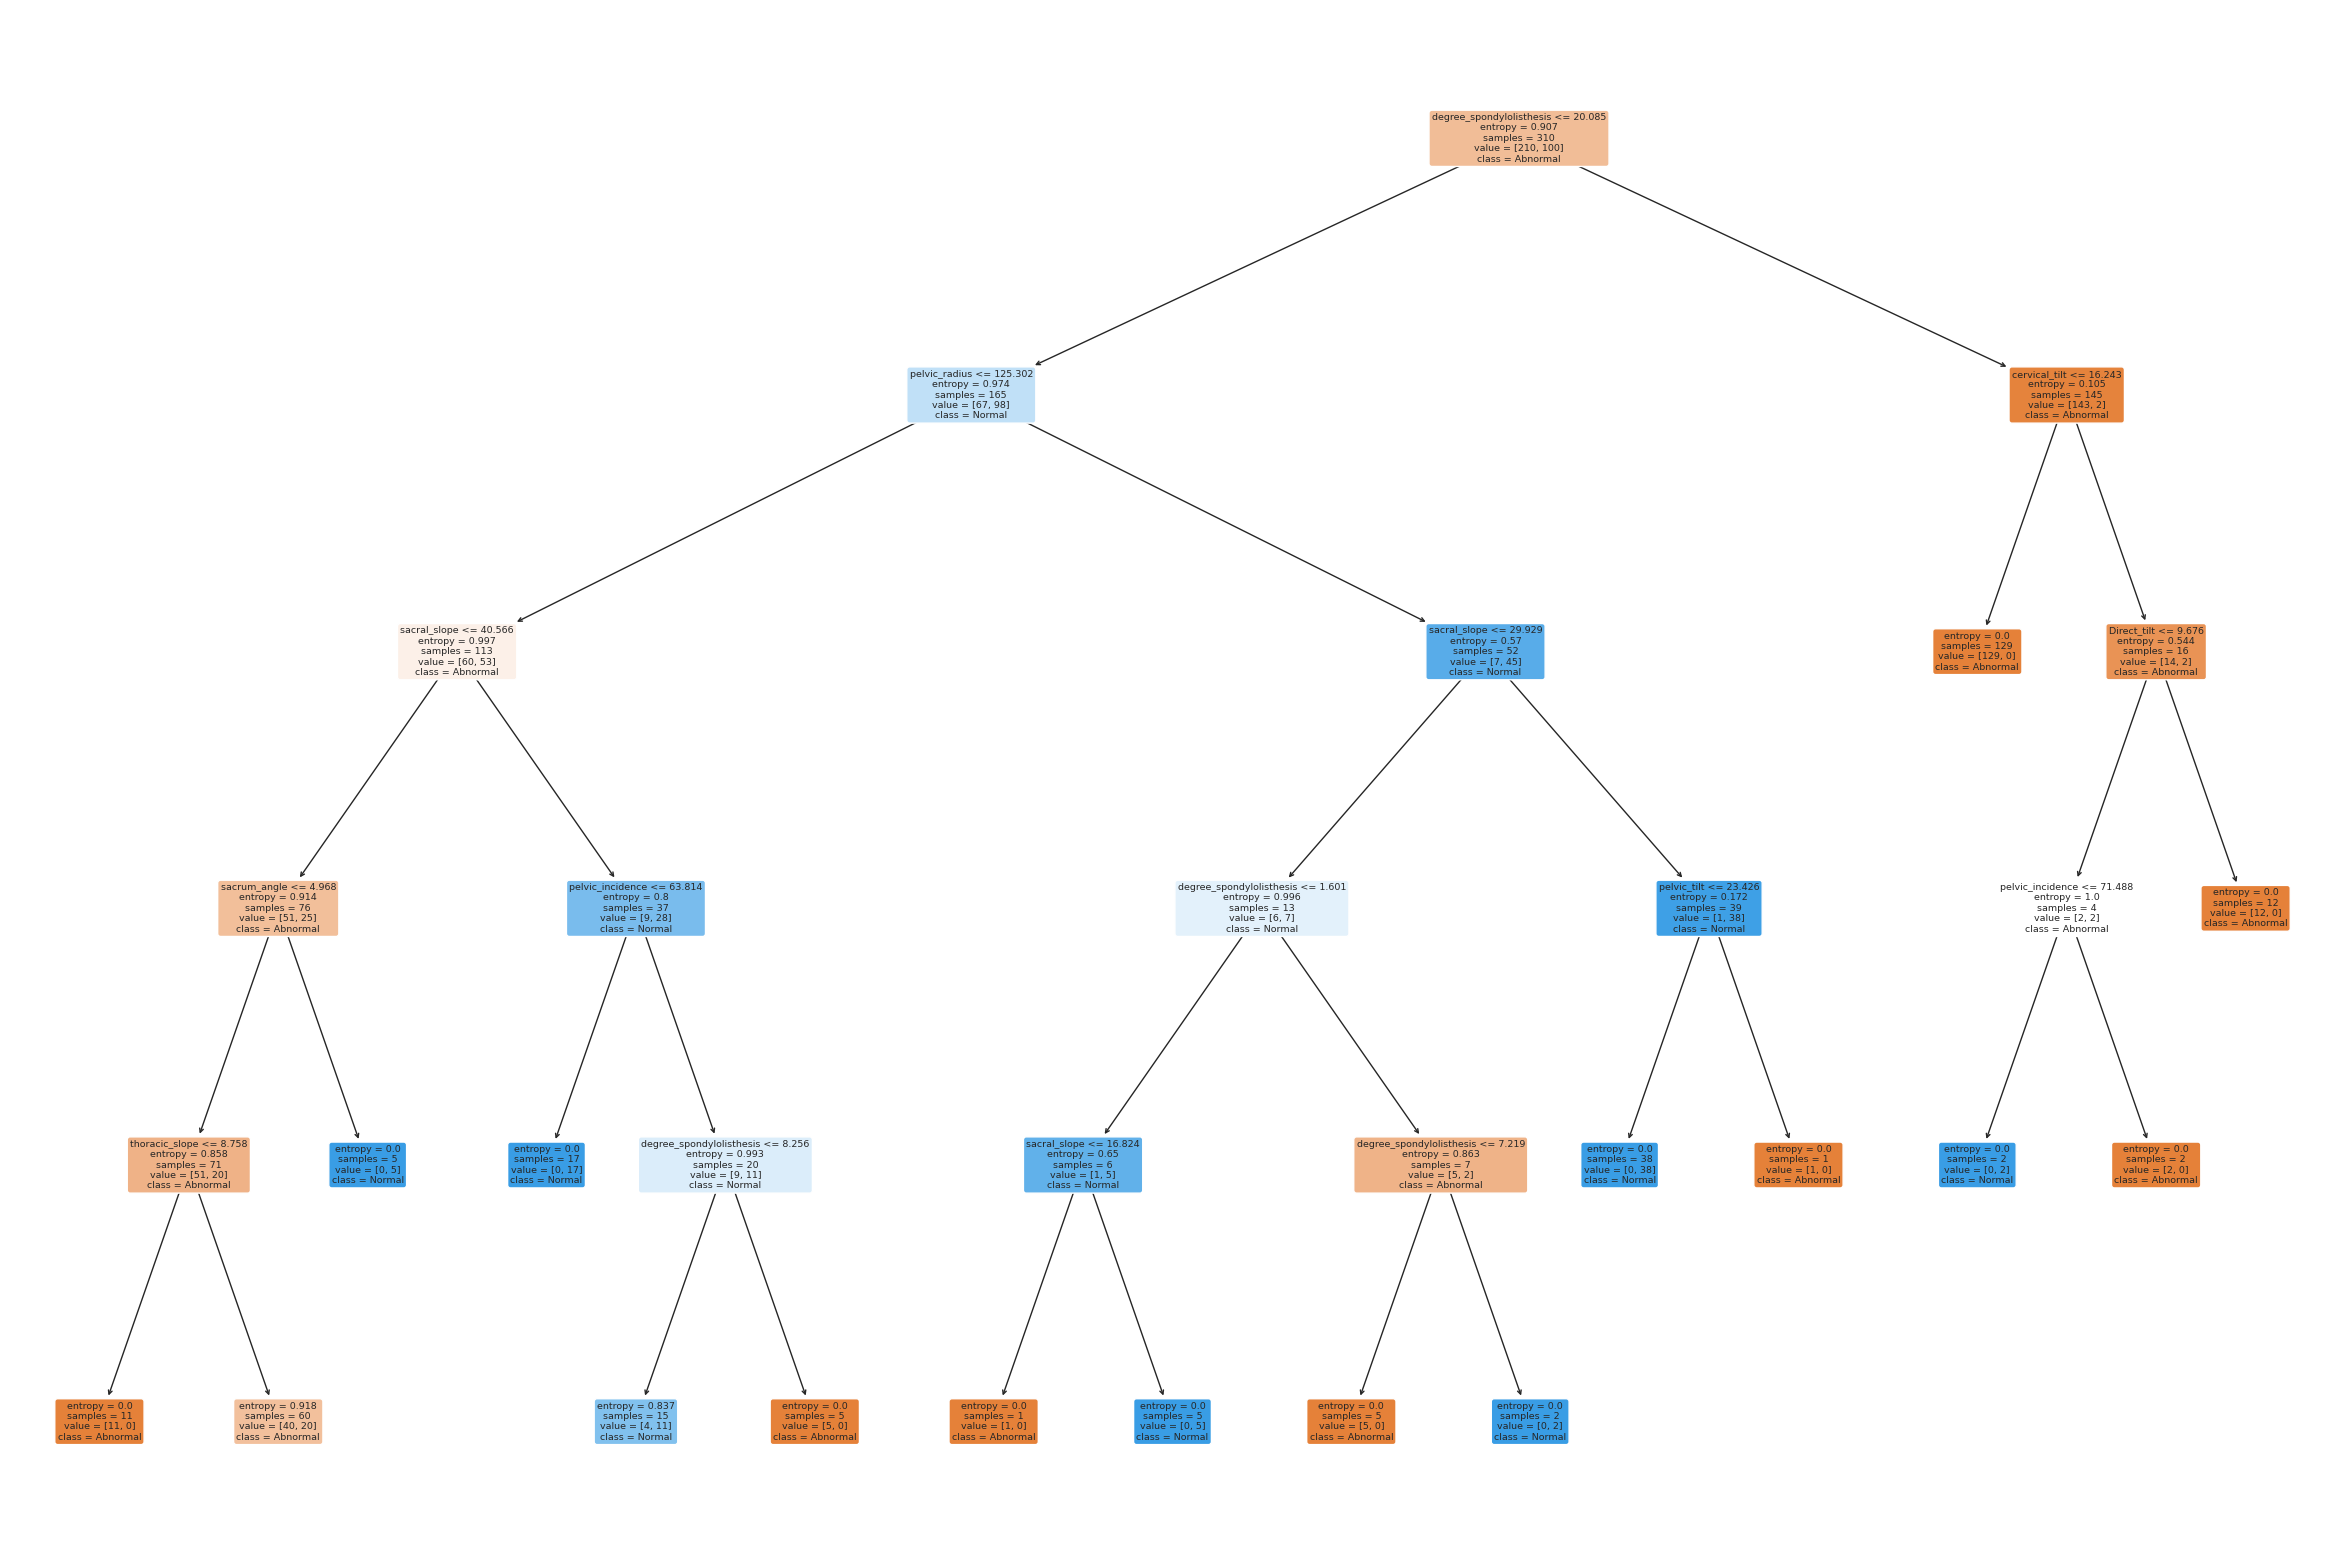

In [56]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Pintamos el árbol
plt.figure(figsize=(30,20))
names = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'pelvic_slope', 'Direct_tilt', 'thoracic_slope', 'cervical_tilt', 'sacrum_angle', 'scoliosis_slope']
plot_tree(clf, filled=True, feature_names=names, class_names=['Abnormal', 'Normal'], rounded=True)
plt.show()

Feature: 0, Score: 0.06442
Feature: 1, Score: 0.03142
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.12878
Feature: 4, Score: 0.08638
Feature: 5, Score: 0.56923
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.02199
Feature: 8, Score: 0.02717
Feature: 9, Score: 0.03057
Feature: 10, Score: 0.04005
Feature: 11, Score: 0.00000


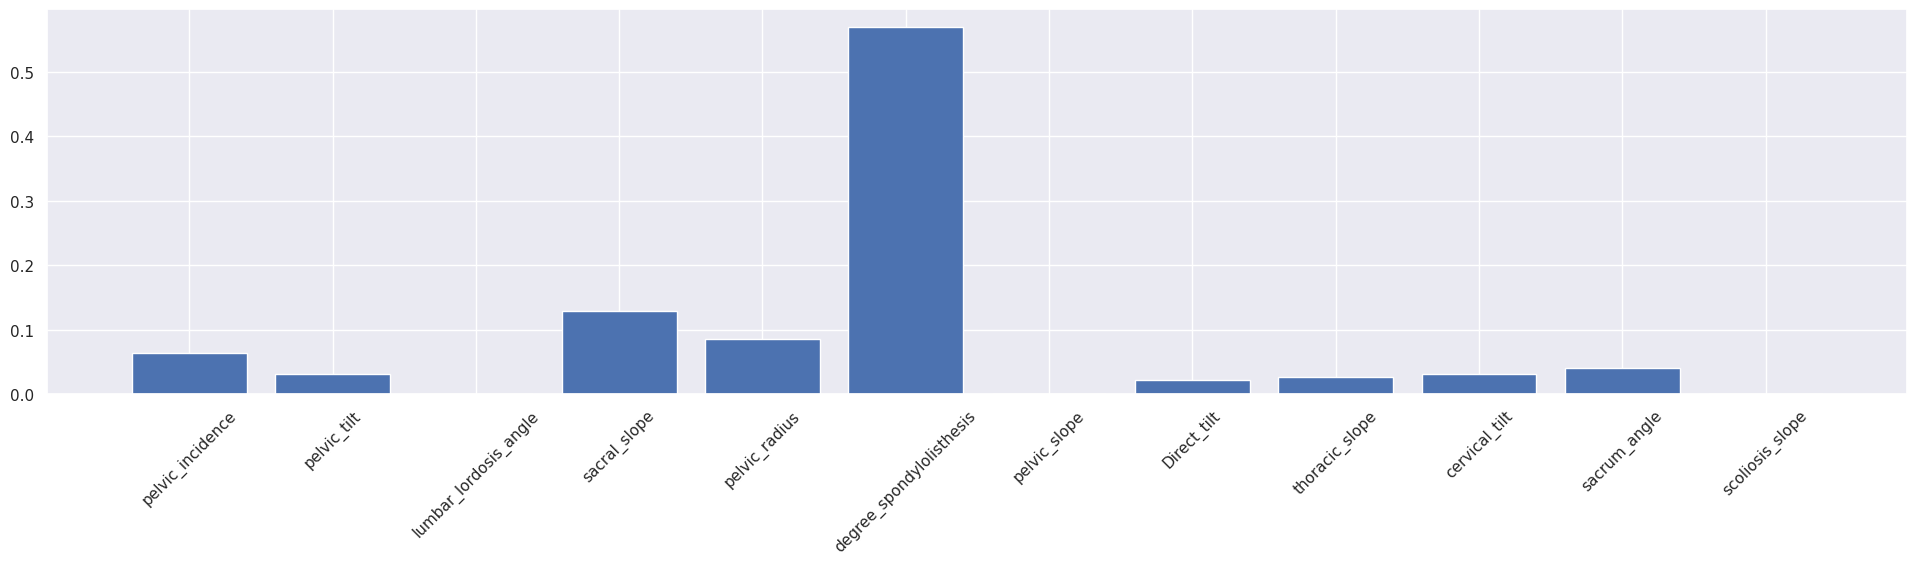

In [57]:
from matplotlib import pyplot as plt

importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
feature_names=['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'pelvic_slope', 'Direct_tilt', 'thoracic_slope', 'cervical_tilt', 'sacrum_angle', 'scoliosis_slope']
plt.figure(figsize=(24,5))
plt.bar([x for x in range(len(importance))], importance, tick_label = feature_names)
plt.xticks(rotation = 45) 
plt.show()

Con esos gráficos:

- Las variables más importantes en el orden son:
degree_spondylolisthesis, sacral_slope, pelvic_radius and pelvic_incidence.

- No se han usado estas variables del conjunto de datos:
lumbar_lordosis_angle, pelvic_slope and scoliosis_slope.

- La tasa de aciertos (accuracy) del árbol sobre el conjunto de entrenamiento si sólo hiciera una pregunta sería de: 0.7709677419354839 segun el test_accuracy.

- El árbol que hemos calculado SI es capaz de separar las clases.
De hecho, el árbol determina cuando es "Abnormal" o "Normal".

- En la parte del arbol que vemos, las variables ayudan mejor a discriminar las clases son degree_spondylolisthesis, sacral_slope y pelvic_radius.

- Hay confusión en los nodos del segundo nivel del árbol para los dos nodos de derecha porque sus nodos "hijos" tienen el mismo valor.


## 3.4) Estudiando el error

Calcula la precisión, exhaustividad y valor F1 agregadas usando la profundidad óptima del árbol y validación cruzada en 10 partes. ¿Qué podemos decir sobre el funcionamiento general de nuestro clasificador?

Calcula el informe detallado para cada una de las clases y dibuja la matriz de confusión. ¿Cómo se comporta nuestro clasificador en cada una de las clases?

Finalmente, ¿cómo de fiable te parece? ¿crees que aportaría algo en una empresa real? Analiza las ventajas y desventajas de utilizar un clasificador basado en árboles de decisión en el contexto de este problema.

In [43]:
# Importamos las métricas que vamos a evaluar para cada una de las clases
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Escribimos las métricas que queremos evaluar
scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']

# Construimos el clasificador
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=2, random_state=RANDOM_STATE)

# Calculamos las métricas utilizando validación cruzada
scores = cross_validate(clf, data_select, salida, scoring=scoring_metrics, 
                        cv=10, return_train_score=False)

# Mostrar las métricas agregadas
print('Precisión ponderada media: ',np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ',np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ',np.mean(scores['test_f1_weighted']))

Precisión ponderada media:  0.7871644779821497
Exhaustividad ponderada media:  0.7741935483870968
F1 ponderado media:  0.7597108196792857


En general, nuestro clasificador tiene una precisión de 0.79, lo que quiere decir que acertará aproximadamente 4 de cada 5 veces, el recall (o exhaustividad) tiene un valor de 0.78, un poco menor que la precisión y, puesto que el valor F1 es una combinación de ambos, el valor es 0.76.

In [44]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Esta función entrena 10 clasificadores usando validación cruzada y devuelve una predicción
# para cada punto usando el clasificador que no fue entrenado con ese punto
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_split=2, random_state=RANDOM_STATE)
predictions = cross_val_predict(clf, data_select, salida, cv=10)

# Informe por clases
cr = classification_report(salida,predictions, target_names=['Abnormal', 'Normal'])
print(cr)

              precision    recall  f1-score   support

    Abnormal       0.81      0.82      0.81       210
      Normal       0.61      0.59      0.60       100

    accuracy                           0.75       310
   macro avg       0.71      0.70      0.71       310
weighted avg       0.74      0.75      0.74       310



En este caso podemos ver que el clasificador se comporta mejor para la clase "Abnormal", lo que suponiamos desde el principio debido al desiquilibrio entre los datos de estudio: la clase "Abnormal" es más frecuente que la clase "Normal" (aprox. 2/3 frente a 1/3).
Al final el clasicador funciona bastante bien con un "accuracy" de 75%. Podría mejorarse añadiendo datos de la clase "Normal".

## 4) Resuelve el mismo problema usando un clasificador k-NN

Busca el valor óptimo para el número de vecinos

### Normalización de los datos

Las variables de este conjunto de datos son numéricas pero de una escala muy diferente por lo que para usar el k-NN o MLP es conveniente escalar los datos. 

In [45]:
from sklearn.preprocessing import MinMaxScaler

# Normalizamos los datos escalándolos al intervalo [0,1]
scaler = MinMaxScaler()
data_select = data[['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'pelvic_slope', 'Direct_tilt', 'thoracic_slope', 'cervical_tilt', 'sacrum_angle', 'scoliosis_slope']]
scaler.fit(data_select)
data_select = scaler.transform(data_select) # Lo almacenamos en el dataset original

# Creamos un nuevo dataframe con los datos escalados
names = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'pelvic_slope', 'Direct_tilt', 'thoracic_slope', 'cervical_tilt', 'sacrum_angle', 'scoliosis_slope']
data_scaled = pd.DataFrame(data=data_select, columns=names)
data_scaled['result'] = (data['Class_att'] == 'Normal').astype(int)
#data_scaled['result'] = data_scaled['result'].map({0: 'Abnormal', 1: 'Normal'})
data_scaled.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,result
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,0.331276,0.430419,0.339450,0.273794,0.514452,0.086952,0.471832,0.481023,0.490527,0.500764,0.502473,0.499235,0.322581
std,0.166237,0.178762,0.166043,0.124216,0.143215,0.087428,0.287048,0.290724,0.276710,0.295518,0.289298,0.279926,0.468220
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.195613,0.307608,0.205831,0.184895,0.436900,0.029474,0.222123,0.202827,0.275105,0.256427,0.260246,0.272710,0.000000
50%,0.313862,0.409251,0.318253,0.268714,0.518189,0.053133,0.474855,0.500730,0.480266,0.502859,0.488992,0.480109,0.000000
75%,0.450685,0.512180,0.438509,0.363946,0.595613,0.121847,0.704722,0.737865,0.720461,0.749831,0.752264,0.722457,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
data_scaled.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,result
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148,0.744554,0.186396,0.610506,0.845115,0.156861,0.977797,0
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365,0.413783,0.197208,0.854170,0.996300,0.230878,0.243812,0
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523,0.473750,0.666533,0.850409,0.983442,0.148026,0.327166,0
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838,0.367741,0.556360,0.461461,0.448790,0.113989,0.316741,0
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173,0.542524,0.957940,0.725757,0.188118,0.447450,0.479711,0


### Seleccion del valor de k para k-NN

Podemos seleccionar el valor óptimo de vecinos más cercanos usando validación cruzada con distintos valores de k.

In [47]:
from sklearn.neighbors import KNeighborsClassifier

# Medias y desviaciones típicas de accuracy para distintos valores de k
accuracy_mean = []
accuracy_std = []

k_values = range(1,15)
for k in k_values: 
    # Entrenar y validar
    clf = KNeighborsClassifier(k, weights='distance')
    bin_result = (data['Class_att'] == 'Normal').astype(int)
    scores = cross_validate(clf, data_scaled, bin_result, scoring='accuracy', cv=10, error_score='raise')
    
    accuracy_mean.append(np.mean(scores['test_score']))
    accuracy_std.append(np.std(scores['test_score']))
    
accuracy_mean

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

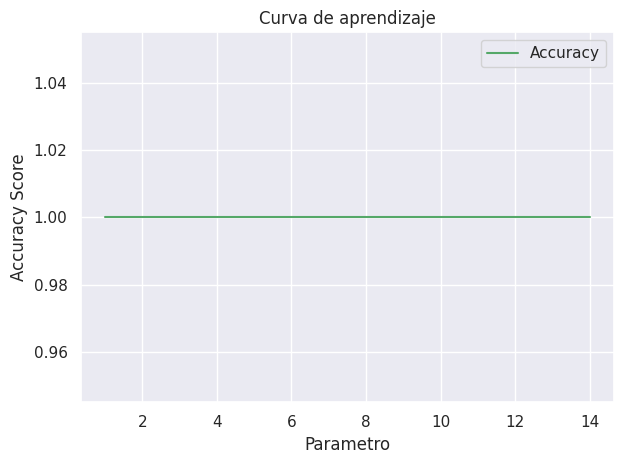

In [48]:
# Dibujamos la línea con la accuracy (exactitud) en el test
plt.plot(k_values, accuracy_mean, color="g", label="Accuracy")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(accuracy_mean) - np.array(accuracy_std)
upper_limit = np.array(accuracy_mean) + np.array(accuracy_std)
plt.fill_between(k_values, lower_limit, upper_limit)

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Asi encontramos que 1 vecino es suficiente para la validación cruzada. El  clasificador k-NN funciona perfectamente (accuracy de 100%) desde solo un vecino.

## 5) Resuelve el mismo problema usando un clasificador MLP

Optimiza el coeficiente de regularización


Las variables de este conjunto de datos son numéricas pero de una escala muy diferente por lo que para usar el clasificador MLP, como para el k-NN, trabajamos con datos escalados. 

Buscamos el mejor coeficiente de regularización usando validación cruzada.

De todos los parámetros que podemos configurar en la red neuronal vamos a optimizar el coeficiente de regularización.

Vamos a explorar una red con una capa oculta con 100 neuronas, función de activación ReLU, tamaño de mini-batch 100, tasa de aprendizaje 0.1, y máximo de 500 iteraciones a los datos (epochs).

In [58]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
import numpy as np

RANDOM_STATE=333
accuracy_mean = []
accuracy_std = []

# Entrenar y validar distintas configuraciones
regul_param_range = np.arange(0.1, 2.1, step=0.2) # [0.5, 0.75,  ..., 2]
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_validate(mlp, data_scaled, bin_result, scoring='accuracy', cv=10)
    
    accuracy_mean.append(np.mean(scores['test_score']))
    accuracy_std.append(np.std(scores['test_score']))

accuracy_mean

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

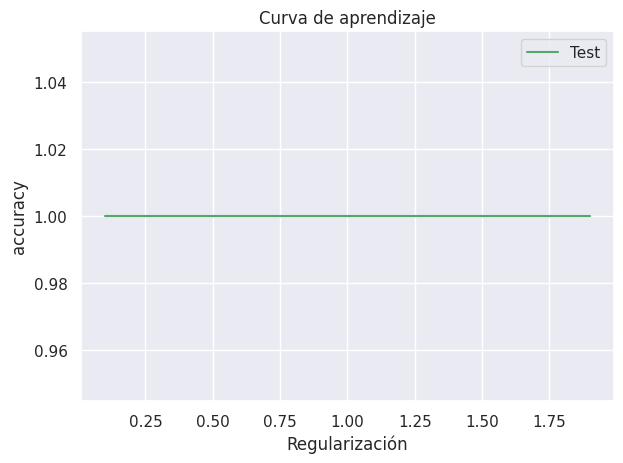

In [50]:
import matplotlib.pyplot as plt

# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(regul_param_range, accuracy_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(accuracy_mean) - np.array(accuracy_std)
upper_limit = np.array(accuracy_mean) + np.array(accuracy_std)
plt.fill_between(regul_param_range, lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización"), plt.ylabel("accuracy"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

El comportamiento es totalmente estable para este parámetro en el rango observado. Podemos tomar como mejor valor (mayor accuraccy) del coeficiente de regularización α=0.3.

In [51]:
# Importamos las métricas que vamos a evaluar para cada una de las clases
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.model_selection import cross_validate

# Escribimos las métricas que queremos evaluar
# Precisión, Exhausitividad y F1 se calculan para cada clase
# Existen diferentes formas de agregar el resultado de cada clase.  
# Nosotors optamos por calcular el valor de cada clase, y hacer una media ponderada según
# la proporción de instancias de cada clase en la muestra porque la muestra está desbalanceada
scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']

# Los mejores resultados se obtenían para k=4 sobre los datos re-escalados
clf = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=0.3, batch_size=100, 
             learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)

# Calculamos las métricas sobre los datos escalados utilizando validación cruzada
# Por defecto usa "estratificación"
scores = cross_validate(clf, data_scaled, bin_result, scoring=scoring_metrics, 
                        cv=10, return_train_score=False)

# scores te devuelve un diccionario con varios elementos, 
# entre ellos los resultados de las métricas elegidas en el test
scores

{'fit_time': array([1.11026788, 1.31697226, 1.8025589 , 1.91788101, 1.62765288,
        1.3349638 , 1.2382741 , 1.1604991 , 0.47170782, 0.44962859]),
 'score_time': array([0.01066041, 0.02448916, 0.01889825, 0.02915859, 0.02126122,
        0.0176084 , 0.01618409, 0.0150547 , 0.00891066, 0.00892615]),
 'test_precision_weighted': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'test_recall_weighted': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'test_f1_weighted': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}

In [52]:
print('Precisión ponderada media: ',np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ',np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ',np.mean(scores['test_f1_weighted']))

Precisión ponderada media:  1.0
Exhaustividad ponderada media:  1.0
F1 ponderado media:  1.0


In [53]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Esta función entrena 10 clasificadores usando validación cruzada y devuelve una predicción
# para cada punto usando el clasificador que no fue entrenado con ese punto
clf = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=0.3, batch_size=100, 
             learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)
predictions = cross_val_predict(clf, data_scaled,bin_result, cv=10)

# Informe por clases
cr = classification_report(bin_result, predictions, target_names=['Abnormal', 'Normal'])
print(cr)

              precision    recall  f1-score   support

    Abnormal       1.00      1.00      1.00       210
      Normal       1.00      1.00      1.00       100

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310



Con el clasificador MLP, los resultados son mucho mejor con 100% de éxito para las clases.